# Topic Modelling 

## Problem Statement:
3.1. **Categorize Companies on the basis of Key-words:** Categorize all companies into the given ten industry segments using the respective keywords. 
3.2. **Clustering Companies:** Cluster the companies into an optimum number of clusters.

## Data Pre-processing:
The following steps will be performed on short_descriptions of companies:
1. **Tokenisation:** Split the text into a list of words in lower-case and after removing punctuation. 
2. Remove all the stopwords.
3. Remove all words that have less than 3 characters. 
4. **Lemmatization:** Changing words from third-person to first person, past and future tense to present tense. 
5. **Stemming:** It is reducing a word to its root form. For example, the root form of "Walking" is "walk" ; "consultant" should be reduced to "consult". 

## 3.1 Categorise companies using Keywords:

### Methodology:
1. Write a function that compares the processed list of given industry segments keywords with the processed words of each company description. This function should return a comparison score. 
2. Industry segment with maximum score will be assigned. 


In [8]:
#Loading the required packages. 
import pandas as pd
import numpy as np
np.random.seed(400)

#NLP Packages
import gensim
from gensim.utils import simple_preprocess
from nltk.stem import WordNetLemmatizer, SnowballStemmer

from nltk.stem.porter import *
from nltk.corpus import stopwords

In [2]:
company_descriptions = pd.read_excel("Company Descriptions.xlsx")
company_descriptions.head()

,company_name,company_short_description,company_description
0,Codementor,Codementor is an online marketplace connecting...,Codementor provides live 1:1 help for software...
1,AgShift,AgShift is designing world's most advanced aut...,AgShift solution blends Deep Learning with Com...
2,Shipsi,Shipsi empowers any retailer with the ability ...,Shipsi empowers any retailer with the ability ...
3,OpenNews,"OpenNews helps a global network of developers,...","We're helping a global network of developers, ..."
4,Biobot Analytics,Biobot Analytics analyzes city sewage to estim...,Biobot Analytics analyzes sewage to estimate o...


In [3]:
industry_segments = pd.read_excel("Industry Segments - Top 10 Keywords.xlsx")
industry_segments

,Industry segment,Tags
0,Aerospace and defense,"Security, systems, video, surveillance, servic..."
1,Agriculture and forestry,"Service, cleantech, water, agriculture, traits..."
2,Biopharmaceuticals,"Developer, treatment, drug, diseases, technolo..."
3,Business support services,"Service, platform, online, management, data, m..."
4,Communications and networking,"Service, wireless, network, data, internet, ap..."
5,Construction and civil engineering,"Service, cleantech, water, energy, waste, trea..."
6,Consumer information services,"Online, users, web, service, platform, social,..."
7,Electronics and computer hardware,"Technology, storage, energy, systems, applicat..."
8,Financial institutions and services,"Service, financial, payment, online, platform,..."
9,Food and beverage,"Food, organic, tea, beverages, ingredients, na..."


## Data Preprocessing: Methodology:
1. Write a function **lemmatize_and_stem** that takes in a word as input and returns the lemmatized and stemmed form of the word. 
2. Write a function **preprocess** that first tokenises the text and then uses the above function to lemmatize and step each token. 

In [7]:
# Write a function that lemmatizes and stems a given words. 
def lemmatize_and_stem(text):
    stemmer = SnowballStemmer("english")
    lemmatized_word = WordNetLemmatizer().lemmatize(text, pos='v')
    return stemmer.stem(lemmatized_word)

# Checking the function:
print(lemmatize_and_stem("went"))
print(lemmatize_and_stem("researched"))

go
research


In [9]:
# Write a function that first tokenises the text and then lemmatizes and stems the words. 
def preprocess(text):
    result=[]
    #Tokenise the text
    tokens = gensim.utils.simple_preprocess(text) 
    #Remove stopwords from the tokens. Also remove words that have less than 3 characters
    tokens = [word for word in tokens if not word in stopwords.words('english') and len(word) >3]
    #Lemmatize and Stem each token
    for token in tokens:
        result.append(lemmatize_and_stem(token))
            
    return result

In [10]:
#Checking the function written:

print("Original Company Description: \n", company_descriptions["company_short_description"][0])
print("\n")
print("Pre-Processed Company Description: \n", preprocess(company_descriptions["company_short_description"][0]))

Original Company Description: 
 Codementor is an online marketplace connecting developers with experts for on-demand 1:1 help via screen sharing, video, and text chat.


Pre-Processed Company Description: 
 ['codementor', 'onlin', 'marketplac', 'connect', 'develop', 'expert', 'demand', 'help', 'screen', 'share', 'video', 'text', 'chat']


In [11]:
#List of all the pre-processed company descriptions (short). We'll use this for further analysis.
processed_docs = []

for doc in company_descriptions["company_short_description"]:
    processed_docs.append(preprocess(doc))

In [15]:
processed_docs[:2]

[['codementor',
  'onlin',
  'marketplac',
  'connect',
  'develop',
  'expert',
  'demand',
  'help',
  'screen',
  'share',
  'video',
  'text',
  'chat'],
 ['agshift',
  'design',
  'world',
  'advanc',
  'autonom',
  'food',
  'inspect',
  'system',
  'use',
  'deep',
  'learn']]

In [16]:
# Let's also process the keywords given for industry segments:
processed_segment_keywords = []

for doc in industry_segments["Tags"]:
    processed_segment_keywords.append(preprocess(doc))
    
processed_segment_keywords[:2]

[['secur',
  'system',
  'video',
  'surveil',
  'servic',
  'aircraft',
  'militari',
  'system',
  'technolog',
  'flight'],
 ['servic',
  'cleantech',
  'water',
  'agricultur',
  'trait',
  'food',
  'plant',
  'crop',
  'irrig',
  'agricultur']]

In [19]:
from collections import Counter
import math

#Function that compares similarity between two lists. 
def counter_cosine_similarity(l1, l2):
    
    c1 = Counter(l1)
    c2 = Counter(l2)
    terms = set(c1).union(c2)
    dotprod = sum(c1.get(k, 0) * c2.get(k, 0) for k in terms)
    magA = math.sqrt(sum(c1.get(k, 0)**2 for k in terms))
    magB = math.sqrt(sum(c2.get(k, 0)**2 for k in terms))
    return dotprod / (magA * magB)

In [21]:
#Checking the function
check_list1 = ['email','user','this','email','address','customer']
check_list2 = ['email','mail','address','netmail']

print("Similarity score between lists is:",counter_cosine_similarity(check_list1, check_list2) * 100)

Similarity score between lists is: 53.03300858899106


In [33]:
company_descriptions["Industry Segment"]
for idx in company_descriptions.index:
    cosine_similarity_scores = []
    for i in range(len(processed_segment_keywords)):
        try:
            cosine_similarity_scores.append(counter_cosine_similarity(processed_docs[idx],processed_segment_keywords[i]))
        except:
            pass
    try:
        industry_idx = cosine_similarity_scores.index(max(cosine_similarity_scores))
        industry_name = industry_segments["Industry segment"][industry_idx]
    except:
        industry_name = "Not Categorised"
    company_descriptions["Industry Segment"][idx] = industry_name

In [34]:
company_descriptions.sample(7)

,company_name,company_short_description,company_description,Industry Segment
241,Vobi,"From mobile to desktop, Vobi connects teams an...",Vobi provides instant collaboration video/voic...,Consumer information services
5417,CiBO Technologies,"We combine science, data, and software to deve...",Our science-powered software platform models a...,Business support services
17220,Planet Alumni,Planet Alumni created and owns planetalumni.co...,"Planet Alumni, KC Alumni, Greek Alumni and Com...",Consumer information services
17077,Solaris Therapeutics,Solaris Therapeutics,NaN,Biopharmaceuticals
5423,MealPal,MealPal is a subscription service that provide...,MealPal is a subscription service that provide...,Travel and leisure
1021,Guild Education,Guild Education's lifelong learning platform o...,Guild Education's lifelong learning platform o...,Media and content
12885,Strive Health,Strive Health is a kidney care company.,Strive Health is a built-for-purpose company w...,Healthcare services


In [52]:
company_descriptions.to_csv("3.1_Categorising_Companies_based_on_Keywords.csv")

## 3.2 Clustering using LDA:

###  Methodology:
1. Use **Latent Dirichlet Allocation (LDA)** method for unsupervised clustering of company descriptions. 
2. **Elbow Method:** Calculate Coherence score for different number of clusters, this will help us in deciding optimum number of clusters. 
3. Hyper parameter tuning for better results. 


In [42]:
#Create a Gensim Dictionary
id2word = gensim.corpora.Dictionary(processed_docs)

In [43]:
# Create a Gensim Corpus
bow_corpus = [id2word.doc2bow(doc) for doc in processed_docs]

In [44]:
document_num = 1
bow_doc_x = bow_corpus[document_num]

for i in range(len(bow_doc_x)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_x[i][0], 
                                                     id2word[bow_doc_x[i][0]], 
                                                     bow_doc_x[i][1]))

Word 13 ("advanc") appears 1 time.
Word 14 ("agshift") appears 1 time.
Word 15 ("autonom") appears 1 time.
Word 16 ("deep") appears 1 time.
Word 17 ("design") appears 1 time.
Word 18 ("food") appears 1 time.
Word 19 ("inspect") appears 1 time.
Word 20 ("learn") appears 1 time.
Word 21 ("system") appears 1 time.
Word 22 ("use") appears 1 time.
Word 23 ("world") appears 1 time.


In [46]:
# Function that returns Coherence Value. This function will help us in finding optimum number of clusters.
from gensim.models.coherencemodel import CoherenceModel
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        print("Number of Clusters being categorised:",num_topics)
        model = gensim.models.LdaMulticore(corpus=corpus,
                                           num_topics=num_topics,
                                           id2word=dictionary)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

Number of Clusters being categorised: 2
Number of Clusters being categorised: 5
Number of Clusters being categorised: 8
Number of Clusters being categorised: 11
Number of Clusters being categorised: 14
Number of Clusters being categorised: 17
Number of Clusters being categorised: 20
Number of Clusters being categorised: 23
Number of Clusters being categorised: 26


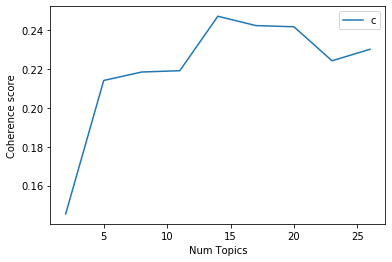

Num Topics = 2  has Coherence Value of 0.1455
Num Topics = 5  has Coherence Value of 0.214
Num Topics = 8  has Coherence Value of 0.2184
Num Topics = 11  has Coherence Value of 0.219
Num Topics = 14  has Coherence Value of 0.247
Num Topics = 17  has Coherence Value of 0.2422
Num Topics = 20  has Coherence Value of 0.2416
Num Topics = 23  has Coherence Value of 0.2241
Num Topics = 26  has Coherence Value of 0.23


In [47]:
import matplotlib.pyplot as plt

model_list, coherence_values = compute_coherence_values(dictionary=id2word,
                                                        corpus=bow_corpus,
                                                        texts=processed_docs,
                                                        start=2,
                                                        limit=27,
                                                        step=3)
# Show graph
limit=27
start=2
step=3
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))
    
# Select the model and print the topics
#optimal_model = model_list[3]
#model_topics = optimal_model.show_topics(formatted=False)
#pprint(optimal_model.print_topics(num_words=10))

The elbow has spiked at 5 Clusters and 14 Clusters. 
<br>
Nevertheless, the coherence score is not high. The clusters thus formed may not be accurate. It requires even more hyper tuning to increase coherence score.
<br>
We'll proceed with 14 Clusters.

In [58]:
# Using LDA for unsupervised classification of the text corpus into 5 categories. 
lda_model =  gensim.models.LdaMulticore(bow_corpus, 
                                   num_topics = 14, 
                                   id2word = id2word)

In [59]:
for idx, topic in lda_model.print_topics(-1):
    print("Topic: {} \nWords: {}".format(idx, topic ))
    print("\n")

Topic: 0 
Words: 0.019*"provid" + 0.018*"platform" + 0.016*"compani" + 0.016*"solut" + 0.016*"media" + 0.012*"market" + 0.011*"offer" + 0.011*"technolog" + 0.009*"busi" + 0.009*"base"


Topic: 1 
Words: 0.050*"provid" + 0.036*"manag" + 0.026*"softwar" + 0.026*"servic" + 0.025*"solut" + 0.022*"platform" + 0.011*"onlin" + 0.010*"industri" + 0.009*"compani" + 0.009*"energi"


Topic: 2 
Words: 0.032*"solut" + 0.024*"provid" + 0.017*"develop" + 0.012*"network" + 0.011*"busi" + 0.011*"base" + 0.011*"compani" + 0.009*"offer" + 0.008*"data" + 0.008*"intellig"


Topic: 3 
Words: 0.032*"data" + 0.020*"develop" + 0.018*"provid" + 0.011*"platform" + 0.010*"compani" + 0.010*"busi" + 0.010*"base" + 0.009*"help" + 0.009*"analyt" + 0.008*"power"


Topic: 4 
Words: 0.034*"compani" + 0.017*"develop" + 0.016*"technolog" + 0.012*"platform" + 0.011*"real" + 0.011*"game" + 0.009*"product" + 0.009*"data" + 0.009*"offer" + 0.007*"onlin"


Topic: 5 
Words: 0.028*"technolog" + 0.022*"compani" + 0.019*"platform"

In [60]:
#Functions to return the LDA topic and strength of assignment for each document. 

def Sort_Tuple(tup):  
    tup.sort(key = lambda x: x[1],reverse=True)  
    return tup  

def LDA_topic(doc):
    ques_vec = id2word.doc2bow(doc)
    topic_vec = lda_model[ques_vec]
    topic_vec = Sort_Tuple(topic_vec)
    return topic_vec[0][0]

def LDA_strength(doc):
    ques_vec = id2word.doc2bow(doc)
    topic_vec = lda_model[ques_vec]
    topic_vec = Sort_Tuple(topic_vec)
    return topic_vec[0][1]


In [61]:
LDA_assignment = []
LDA_assignment_strength = []
for i in range(len(processed_docs)):
    
    LDA_assignment.append(LDA_topic(processed_docs[i])) 
    
    LDA_assignment_strength.append(LDA_strength(processed_docs[i]))

In [62]:
company_descriptions["LDA_Cluster"] = LDA_assignment
company_descriptions["LDA_assignment_strength"] = LDA_assignment_strength

#company_descriptions.sort_values(by=['LDA_assignment_strength'],inplace=True,ascending=False)
company_descriptions

,company_name,company_short_description,company_description,Industry Segment,LDA_Cluster,LDA_assignment_strength
0,Codementor,Codementor is an online marketplace connecting...,Codementor provides live 1:1 help for software...,Media and content,11,0.933633
1,AgShift,AgShift is designing world's most advanced aut...,AgShift solution blends Deep Learning with Com...,Food and beverage,5,0.922552
2,Shipsi,Shipsi empowers any retailer with the ability ...,Shipsi empowers any retailer with the ability ...,Retailers,8,0.922553
3,OpenNews,"OpenNews helps a global network of developers,...","We're helping a global network of developers, ...",Communications and networking,6,0.928508
4,Biobot Analytics,Biobot Analytics analyzes city sewage to estim...,Biobot Analytics analyzes sewage to estimate o...,Aerospace and defense,4,0.896678
...,...,...,...,...,...,...
19960,Powermat Technologies,Powermat Technologies develops wireless energy...,Powermat Technologies is a developer of wirele...,Electronics and computer hardware,12,0.724349
19961,Properly,The Ultimate Turnover Tool for Vacation Rental...,Properly is a visual checklist tool that lets ...,Travel and leisure,0,0.867309
19962,Bid Ops,Bid Ops accelerates business partnerships betw...,NaN,Software,1,0.867332
19963,Tavolo,Tavolo is an online retailer and destination f...,Tavolo offers an online store that enables its...,Retailers,12,0.494276


# Way Ahead:

Upon observation, the accuracy of the LDA model is very less. While a few industries are well categorised, many are not. It requires a lot more iterations and hyper tuning to be able to accurately classfiy texts into 27 categories.

In [63]:
company_descriptions.to_csv("3.2_Clustering_Companies_using_LDA.csv")